# DeepBLU-Z model testing

Here we will import some fish images and use them to test our trained DeepBLU-Z models.

The hdf5 dataset images_ds.h5 contains 59,835 labeled
images and 2388 unlabeled images for verifying models after training for a total of 62223 images. The
2388 unlabeled images are not used during training and are intended for post-hoc validation like this.

First, let's read in some images and look at the data:

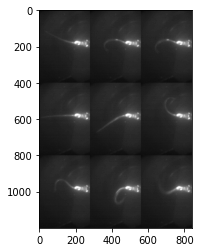

In [36]:
# Import database of images
import h5py
hdf_path = '../data/training_data/images_ds.h5'
hdf_file = h5py.File(hdf_path, 'r')
for gname, group in hdf_file.items():
    for dname, ds in group.items():
        images = ds

# Pull out nine random images from set held out during training and display
import numpy as np
unlabeled_indices = np.linspace(59836, 62223, 62223-59835, dtype=int)

import random
image_indices = random.sample(list(unlabeled_indices), 9)
image_indices.sort()

import matplotlib.pyplot as plt
from skimage.util import montage

images = images[image_indices[:], :, :]
images = np.transpose(images, (0, 2, 1))

plt.imshow(montage(images), cmap='gray')

Now let's run these images through one of our models for pose estimation and display the results:

In [37]:
from PIL import Image

tracked_images = images
for im_num in range(images.shape[0]):
    image = Image.fromarray(images[im_num, :, :])
    image.save('./temp.tif')
    ! python3 ../main.py -m predict --load ../models/old/resnet18_50epochs.tar -t ./temp.tif
    tracked_images[im_num, :, :] = Image.open('./temp_tracked.tif')

GPU enabled
2020-07-30 13:39:45,060:INFO: Start with arguments Namespace(backbone='resnet18', batch_size=16, datapath=PosixPath('data/training_data'), epochs=50, load='../models/old/resnet18_50epochs.tar', lr=0.01, lr_decay=0.001, lr_decay_step=5, mode='predict', num_pts=8, retrain=False, save=None, seed=580509335, shuffle=True, target='./temp.tif', transform=False, val_split=0.2)
/home/userman/.virtualenvs/DeepBLU-Z/lib/python3.6/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
2020-07-30 13:39:46,597:INFO: Loading model from ../models/old/resnet18_50epochs.tar
2020-07-30 13:39:46,597:INFO: Model:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
 

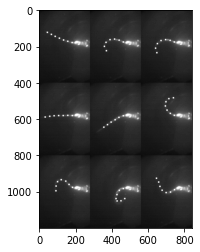

In [38]:
plt.imshow(montage(tracked_images), cmap='gray')